In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('quran_id_full.csv')
df.head()

,id,suraId,verseID,ayahText,indoText,readText
0,0,1,1,بِسْمِ اللّٰهِ الرَّحْمٰنِ الرَّحِيْمِ,"Dengan nama Allah Yang Maha Pengasih, Maha Pen...",bismillāhir-raḥmānir-raḥīm
1,1,1,2,اَلْحَمْدُ لِلّٰهِ رَبِّ الْعٰلَمِيْنَۙ,"Segala puji bagi Allah, Tuhan seluruh alam,",al-ḥamdu lillāhi rabbil-'ālamīn
2,2,1,3,الرَّحْمٰنِ الرَّحِيْمِۙ,"Yang Maha Pengasih, Maha Penyayang,",ar-raḥmānir-raḥīm
3,3,1,4,مٰلِكِ يَوْمِ الدِّيْنِۗ,Pemilik hari pembalasan.,māliki yaumid-dīn
4,4,1,5,اِيَّاكَ نَعْبُدُ وَاِيَّاكَ نَسْتَعِيْنُۗ,Hanya kepada Engkaulah kami menyembah dan hany...,iyyāka na'budu wa iyyāka nasta'īn


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6236 entries, 0 to 6235
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        6236 non-null   int64 
 1   suraId    6236 non-null   int64 
 2   verseID   6236 non-null   int64 
 3   ayahText  6236 non-null   object
 4   indoText  6236 non-null   object
 5   readText  6236 non-null   object
dtypes: int64(3), object(3)
memory usage: 292.4+ KB


In [7]:
df['len_text'] = df['indoText'].apply(lambda x:len(str(x).split()))
df['len_text']

0        8
1        7
2        5
3        3
4       12
        ..
6231     2
6232     2
6233     6
6234     7
6235     5
Name: len_text, Length: 6236, dtype: int64

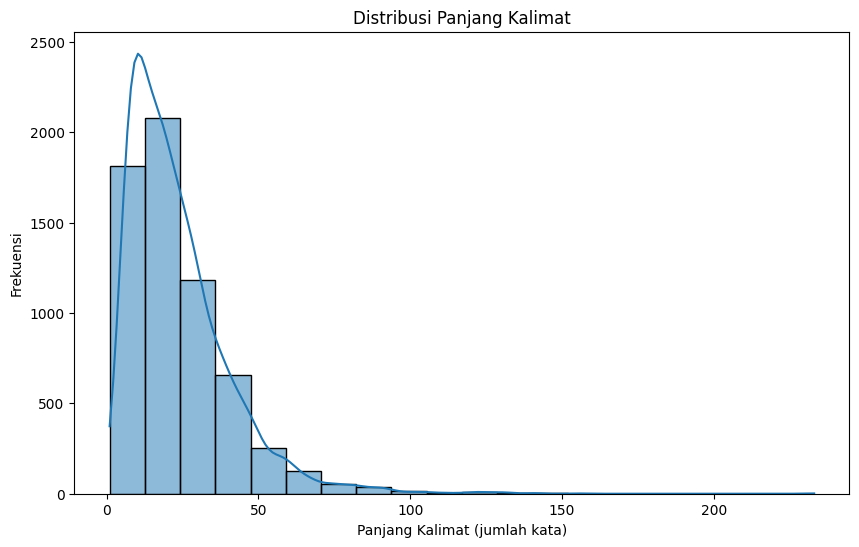

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# chart
plt.figure(figsize=(10, 6))
sns.histplot(df['len_text'], bins=20, kde=True)
plt.title('Distribusi Panjang Kalimat')
plt.xlabel('Panjang Kalimat (jumlah kata)')
plt.ylabel('Frekuensi')
plt.show()

In [9]:
df.describe()

,id,suraId,verseID,len_text
count,6236.000000,6236.000000,6236.000000,6236.000000
mean,3117.500000,33.519724,53.506575,23.591565
std,1800.322471,26.461261,50.463924,17.010204
min,0.000000,1.000000,1.000000,1.000000
25%,1558.750000,11.000000,16.000000,11.000000
50%,3117.500000,26.000000,38.000000,20.000000
75%,4676.250000,51.000000,75.000000,31.000000
max,6235.000000,114.000000,286.000000,233.000000


In [32]:
# juz30 = df[df['suraId']>=78]
# juz30

In [5]:
from transformers import BertTokenizer, BertModel
import torch

# Memuat pre-trained model BERT dan tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Fungsi untuk menghasilkan embedding BERT
def get_bert_embedding(text):
    inputs = tokenizer(text, return_tensors='pt', max_length=512, truncation=True, padding='max_length')
    with torch.no_grad():
        outputs = model(**inputs)
    # Mengambil rata-rata dari seluruh token untuk mendapatkan vektor 2D
    return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()


c:\Users\ubaid\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally 

In [6]:
import pandas as pd

# Memuat dataset Al-Qur'an dari file CSV
dataset = pd.read_csv('quran_id.csv')

# Menghasilkan embedding untuk setiap ayat
dataset['embedding'] = dataset['indoText'].apply(lambda x: get_bert_embedding(x))


In [7]:
from sklearn.metrics.pairwise import cosine_similarity

# Fungsi untuk melakukan pencarian
def search_ayah(query, dataset, top_n=5):
    query_embedding = get_bert_embedding(query).reshape(1, -1)
    similarities = cosine_similarity(query_embedding, list(dataset['embedding']))
    
    # Mengambil ayat dengan kesamaan tertinggi
    top_indices = similarities.argsort()[0][-top_n:][::-1]
    return dataset.iloc[top_indices][['suraId', 'verseID', 'ayahText', 'indoText']]

# Contoh pencarian
query = "kasih sayang"
results = search_ayah(query, dataset)
print(results)


    suraId  verseID                                           ayahText  \
3        1        4                           مٰلِكِ يَوْمِ الدِّيْنِۗ   
1        1        2            اَلْحَمْدُ لِلّٰهِ رَبِّ الْعٰلَمِيْنَۙ   
24       2       18     صُمٌّ ۢ بُكْمٌ عُمْيٌ فَهُمْ لَا يَرْجِعُوْنَۙ   
8        2        2  ذٰلِكَ الْكِتٰبُ لَا رَيْبَ ۛ فِيْهِ ۛ هُدًى ل...   
18       2       12  اَلَآ اِنَّهُمْ هُمُ الْمُفْسِدُوْنَ وَلٰكِنْ...   

                                             indoText  
3                            Pemilik hari pembalasan.  
1         Segala puji bagi Allah, Tuhan seluruh alam,  
24  Mereka tuli, bisu dan buta, sehingga mereka ti...  
8   Kitab (Al-Qur'an) ini tidak ada keraguan padan...  
18  Ingatlah, sesungguhnya merekalah yang berbuat ...  


In [8]:
query = "jelaskan maksud dari surah 1"
results = search_ayah(query, dataset)
print(results)

    suraId  verseID                                           ayahText  \
3        1        4                           مٰلِكِ يَوْمِ الدِّيْنِۗ   
1        1        2            اَلْحَمْدُ لِلّٰهِ رَبِّ الْعٰلَمِيْنَۙ   
24       2       18     صُمٌّ ۢ بُكْمٌ عُمْيٌ فَهُمْ لَا يَرْجِعُوْنَۙ   
21       2       15   اَللّٰهُ يَسْتَهْزِئُ بِهِمْ وَيَمُدُّهُمْ فِ...   
8        2        2  ذٰلِكَ الْكِتٰبُ لَا رَيْبَ ۛ فِيْهِ ۛ هُدًى ل...   

                                             indoText  
3                            Pemilik hari pembalasan.  
1         Segala puji bagi Allah, Tuhan seluruh alam,  
24  Mereka tuli, bisu dan buta, sehingga mereka ti...  
21  Allah akan memperolok-olokkan mereka dan membi...  
8   Kitab (Al-Qur'an) ini tidak ada keraguan padan...  


In [40]:
query = "tauhid"
results = search_ayah(query, dataset)
print(results)

    suraId  verseID                                           ayahText  \
1        1        2            اَلْحَمْدُ لِلّٰهِ رَبِّ الْعٰلَمِيْنَۙ   
83       2       77  اَوَلَا يَعْلَمُوْنَ اَنَّ اللّٰهَ يَعْلَمُ مَ...   
43       2       37  فَتَلَقّٰٓى اٰدَمُ مِنْ رَّبِّهٖ كَلِمٰتٍ فَتَ...   
24       2       18     صُمٌّ ۢ بُكْمٌ عُمْيٌ فَهُمْ لَا يَرْجِعُوْنَۙ   
58       2       52  ثُمَّ عَفَوْنَا عَنْكُمْ مِّنْۢ بَعْدِ ذٰلِكَ ...   

                                             indoText  
1         Segala puji bagi Allah, Tuhan seluruh alam,  
83  Dan tidakkah mereka tahu bahwa Allah mengetahu...  
43  Kemudian Adam menerima beberapa kalimat dari T...  
24  Mereka tuli, bisu dan buta, sehingga mereka ti...  
58  Kemudian Kami memaafkan kamu setelah itu, agar...  
